<a href="https://colab.research.google.com/github/sakshichoudhary193/HRA-_PRACTICAL1_ADT24MGTM0622/blob/main/HRA__PRACTICAL2_ADT24MGTM0622.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 plt.style.use('seaborn-v0_8')
 plt.rcParams['figure.figsize'] = (9, 5)

In [2]:
 df = pd.read_csv('/content/drive/MyDrive/aug_test.csv')
 df = pd.read_csv('/content/drive/MyDrive/aug_train.csv')
 df = pd.read_csv('/content/drive/MyDrive/sample_submission.csv')

In [3]:
 np.random.seed(42)
 channels = ['LinkedIn', 'Referral', 'Job Portal', 'Campus', 'Social Media']
 df['Source'] = np.random.choice(channels, len(df))
 cost_map = {
 'LinkedIn': np.random.randint(900, 1300, len(df)),
 'Referral': np.random.randint(400, 700, len(df)),
 'Job Portal': np.random.randint(700, 900, len(df)),
 'Campus': np.random.randint(300, 500, len(df)),
 'Social Media': np.random.randint(500, 800, len(df))
 }
 df['Cost'] = [cost_map[src][i] for i, src in enumerate(df['Source'])]
 df['Time_to_Hire_Days'] = np.random.randint(15, 45, len(df))
 df['Retention_After_1yr'] = df['target'].apply(lambda x: 0 if x == 1 else 1)
 df[['Source', 'Cost', 'Time_to_Hire_Days','Retention_After_1yr']].head()

,Source,Cost,Time_to_Hire_Days,Retention_After_1yr
0,Campus,302,31,1
1,Social Media,537,35,1
2,Job Portal,829,18,1
3,Social Media,528,35,1
4,Social Media,643,37,1


In [4]:
 summary = df.groupby('Source').agg(
 Avg_Cost=('Cost', 'mean'),
 Avg_Time_to_Hire=('Time_to_Hire_Days', 'mean'),
 Retention_Rate=('Retention_After_1yr', 'mean')
 ).reset_index()
 summary['Retention_Rate(%)'] = summary['Retention_Rate'] * 100
 summary = summary.round(2)
 summary


,Source,Avg_Cost,Avg_Time_to_Hire,Retention_Rate,Retention_Rate(%)
0,Campus,397.19,29.80,1.0,100.0
1,Job Portal,797.98,29.53,1.0,100.0
2,LinkedIn,1104.98,29.09,1.0,100.0
3,Referral,548.81,29.61,1.0,100.0
4,Social Media,648.68,29.93,1.0,100.0


In [6]:
summary['Rank_Score'] = (summary['Retention_Rate(%)'] /
summary['Avg_Cost']) * 100
summary = summary.sort_values('Rank_Score',
ascending=False).reset_index(drop=True)
summary

,Source,Avg_Cost,Avg_Time_to_Hire,Retention_Rate,Retention_Rate(%),Rank_Score
0,Campus,397.19,29.80,1.0,100.0,25.176867
1,Referral,548.81,29.61,1.0,100.0,18.221242
2,Social Media,648.68,29.93,1.0,100.0,15.415922
3,Job Portal,797.98,29.53,1.0,100.0,12.531642
4,LinkedIn,1104.98,29.09,1.0,100.0,9.049938


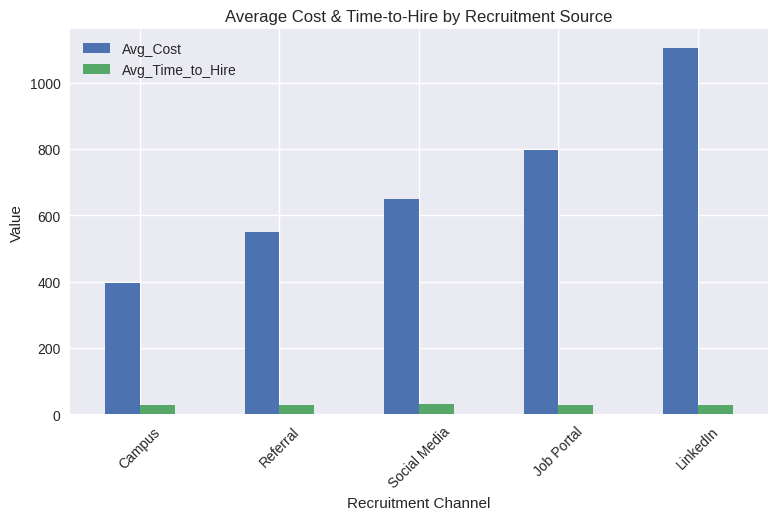

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


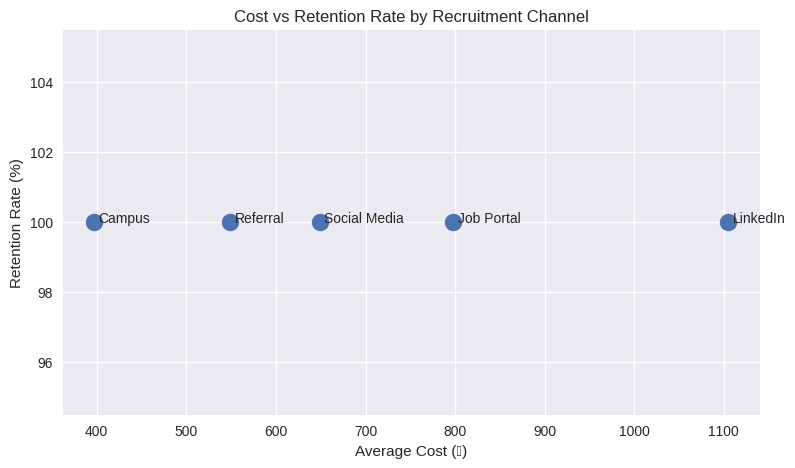

In [9]:
summary.plot(kind='bar', x='Source', y=['Avg_Cost',
'Avg_Time_to_Hire'])
plt.title('Average Cost & Time-to-Hire by Recruitment Source')
plt.ylabel('Value')
plt.xlabel('Recruitment Channel')
plt.xticks(rotation=45)
plt.show()
plt.scatter(summary['Avg_Cost'], summary['Retention_Rate(%)'],
s=150)
for i, txt in enumerate(summary['Source']):
    plt.annotate(txt, (summary['Avg_Cost'][i]+5,
    summary['Retention_Rate(%)'][i]))
plt.title('Cost vs Retention Rate by Recruitment Channel')
plt.xlabel('Average Cost (₹)')
plt.ylabel('Retention Rate (%)')
plt.grid(True)
plt.show()

In [11]:
best_channel = summary.iloc[0]['Source']
print(f" Recommended Channel: {best_channel}")

 Recommended Channel: Campus
